In [5]:
from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils
import os


display(HTML(db_releases_utils.get_remote_database_versions_html()['db_releases_html_table']))


In [ ]:
#Code adapated from the cellphoneDB github

In [2]:
# -- Version of the databse
cpdb_version = 'v5.0.0'

# -- Path where the input files to generate the database are located
cpdb_target_dir = os.path.join('/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB', cpdb_version)

In [ ]:
#from cellphonedb.utils import db_utils

#db_utils.download_database(cpdb_target_dir, cpdb_version)

Downloaded cellphonedb.zip into /Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0
Downloaded complex_input.csv into /Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0
Downloaded gene_input.csv into /Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0
Downloaded interaction_input.csv into /Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0
Downloaded protein_input.csv into /Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0
Downloaded uniprot_synonyms.tsv into /Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/sources
Downloaded transcription_factor_input.csv into /Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/sources


# G0 arrested and fast cycling, pooled, pre and post chemo

In [6]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
        cpdb_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/cellphonedb.zip',
        meta_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/CPDB_df.csv',
        counts_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/adata_with_rounded.h5ad',
        counts_data = 'hgnc_symbol',
        score_interactions = True,
        output_path = './high_level_results')

Reading user files...
The following user files were loaded successfully:
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/adata_with_rounded.h5ad
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/CPDB_df.csv
[ ][CORE][04/04/25-09:40:58][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][04/04/25-09:41:00][INFO] Running Real Analysis
[ ][CORE][04/04/25-09:41:00][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [06:33<00:00,  2.54it/s]

[ ][CORE][04/04/25-09:47:33][INFO] Building Pvalues result


[ ][CORE][04/04/25-09:47:34][INFO] Building results
[ ][CORE][04/04/25-09:47:34][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 14/14 [00:00<00:00, 28.51it/s]

[ ][CORE][04/04/25-09:47:34][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 14/14 [00:00<00:00, 91.53it/s]


[ ][CORE][04/04/25-09:47:35][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 196/196 [00:32<00:00,  6.06it/s]


Saved deconvoluted to ./high_level_results/statistical_analysis_deconvoluted_04_04_2025_094808.txt
Saved deconvoluted_percents to ./high_level_results/statistical_analysis_deconvoluted_percents_04_04_2025_094808.txt
Saved means to ./high_level_results/statistical_analysis_means_04_04_2025_094808.txt
Saved pvalues to ./high_level_results/statistical_analysis_pvalues_04_04_2025_094808.txt
Saved significant_means to ./high_level_results/statistical_analysis_significant_means_04_04_2025_094808.txt
Saved interaction_scores to ./high_level_results/statistical_analysis_interaction_scores_04_04_2025_094808.txt


In [3]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
        cpdb_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/cellphonedb.zip',
        meta_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_CPDB_df_G0.csv',
        counts_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_adata.h5ad',
        counts_data = 'hgnc_symbol',
        score_interactions = True,
        output_path = './post_results')

Reading user files...
The following user files were loaded successfully:
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_adata.h5ad
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_CPDB_df_G0.csv
[ ][CORE][19/05/25-12:20:36][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][19/05/25-12:20:37][INFO] Running Real Analysis
[ ][CORE][19/05/25-12:20:37][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [05:39<00:00,  2.95it/s]

[ ][CORE][19/05/25-12:26:16][INFO] Building Pvalues result


[ ][CORE][19/05/25-12:26:17][INFO] Building results
[ ][CORE][19/05/25-12:26:17][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 14/14 [00:00<00:00, 58.88it/s]

[ ][CORE][19/05/25-12:26:17][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 14/14 [00:00<00:00, 186.65it/s]


[ ][CORE][19/05/25-12:26:17][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 196/196 [00:31<00:00,  6.17it/s]


Saved deconvoluted to ./post_results/statistical_analysis_deconvoluted_05_19_2025_122649.txt
Saved deconvoluted_percents to ./post_results/statistical_analysis_deconvoluted_percents_05_19_2025_122649.txt
Saved means to ./post_results/statistical_analysis_means_05_19_2025_122649.txt
Saved pvalues to ./post_results/statistical_analysis_pvalues_05_19_2025_122649.txt
Saved significant_means to ./post_results/statistical_analysis_significant_means_05_19_2025_122649.txt
Saved interaction_scores to ./post_results/statistical_analysis_interaction_scores_05_19_2025_122649.txt


In [1]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
        cpdb_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/cellphonedb.zip',
        meta_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_CPDB_df_G0.csv',
        counts_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_adata.h5ad',
        counts_data = 'hgnc_symbol',
        score_interactions = True,
        output_path = './pre_results')

Reading user files...
The following user files were loaded successfully:
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_adata.h5ad
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_CPDB_df_G0.csv
[ ][CORE][19/05/25-12:51:08][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][19/05/25-12:51:09][INFO] Running Real Analysis
[ ][CORE][19/05/25-12:51:09][INFO] Running Statistical Analysis


python(9487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]

[ ][CORE][19/05/25-12:58:05][INFO] Building Pvalues result


[ ][CORE][19/05/25-12:58:06][INFO] Building results
[ ][CORE][19/05/25-12:58:06][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 14/14 [00:00<00:00, 54.42it/s]

[ ][CORE][19/05/25-12:58:06][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 14/14 [00:00<00:00, 165.89it/s]


[ ][CORE][19/05/25-12:58:06][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


python(10893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 196/196 [00:30<00:00,  6.33it/s]


Saved deconvoluted to ./pre_results/statistical_analysis_deconvoluted_05_19_2025_125838.txt
Saved deconvoluted_percents to ./pre_results/statistical_analysis_deconvoluted_percents_05_19_2025_125838.txt
Saved means to ./pre_results/statistical_analysis_means_05_19_2025_125838.txt
Saved pvalues to ./pre_results/statistical_analysis_pvalues_05_19_2025_125838.txt
Saved significant_means to ./pre_results/statistical_analysis_significant_means_05_19_2025_125838.txt
Saved interaction_scores to ./pre_results/statistical_analysis_interaction_scores_05_19_2025_125838.txt


# Tumor cells together, pooled, pre and post- chemo

In [1]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
        cpdb_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/cellphonedb.zip',
        meta_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/CPDB_df_tum_only.csv',
        counts_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/adata_with_rounded.h5ad',
        counts_data = 'hgnc_symbol',
        score_interactions = True,
        output_path = './tum_only_pooled')

Reading user files...
The following user files were loaded successfully:
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/adata_with_rounded.h5ad
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/CPDB_df_tum_only.csv
[ ][CORE][08/04/25-13:01:34][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][08/04/25-13:01:38][INFO] Running Real Analysis
[ ][CORE][08/04/25-13:01:38][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [06:36<00:00,  2.52it/s]

[ ][CORE][08/04/25-13:08:14][INFO] Building Pvalues result


[ ][CORE][08/04/25-13:08:14][INFO] Building results
[ ][CORE][08/04/25-13:08:15][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 12/12 [00:00<00:00, 24.70it/s]

[ ][CORE][08/04/25-13:08:15][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 12/12 [00:00<00:00, 80.29it/s]


[ ][CORE][08/04/25-13:08:15][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 144/144 [00:30<00:00,  4.79it/s]


Saved deconvoluted to ./tum_only_pooled/statistical_analysis_deconvoluted_04_08_2025_130846.txt
Saved deconvoluted_percents to ./tum_only_pooled/statistical_analysis_deconvoluted_percents_04_08_2025_130846.txt
Saved means to ./tum_only_pooled/statistical_analysis_means_04_08_2025_130846.txt
Saved pvalues to ./tum_only_pooled/statistical_analysis_pvalues_04_08_2025_130846.txt
Saved significant_means to ./tum_only_pooled/statistical_analysis_significant_means_04_08_2025_130846.txt
Saved interaction_scores to ./tum_only_pooled/statistical_analysis_interaction_scores_04_08_2025_130846.txt


In [1]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
        cpdb_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/cellphonedb.zip',
        meta_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_CPDB_df_tum_only.csv',
        counts_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_adata.h5ad',
        counts_data = 'hgnc_symbol',
        score_interactions = True,
        output_path = './tum_only_pre')

Reading user files...
The following user files were loaded successfully:
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_adata.h5ad
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_CPDB_df_tum_only.csv
[ ][CORE][08/04/25-13:15:15][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][08/04/25-13:15:16][INFO] Running Real Analysis
[ ][CORE][08/04/25-13:15:16][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [07:26<00:00,  2.24it/s]

[ ][CORE][08/04/25-13:22:43][INFO] Building Pvalues result


[ ][CORE][08/04/25-13:22:43][INFO] Building results
[ ][CORE][08/04/25-13:22:44][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 12/12 [00:00<00:00, 46.64it/s]

[ ][CORE][08/04/25-13:22:44][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 12/12 [00:00<00:00, 144.94it/s]


[ ][CORE][08/04/25-13:22:44][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 144/144 [00:26<00:00,  5.49it/s]


Saved deconvoluted to ./tum_only_pre/statistical_analysis_deconvoluted_04_08_2025_132311.txt
Saved deconvoluted_percents to ./tum_only_pre/statistical_analysis_deconvoluted_percents_04_08_2025_132311.txt
Saved means to ./tum_only_pre/statistical_analysis_means_04_08_2025_132311.txt
Saved pvalues to ./tum_only_pre/statistical_analysis_pvalues_04_08_2025_132311.txt
Saved significant_means to ./tum_only_pre/statistical_analysis_significant_means_04_08_2025_132311.txt
Saved interaction_scores to ./tum_only_pre/statistical_analysis_interaction_scores_04_08_2025_132311.txt


In [8]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
        cpdb_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/cellphonedb.zip',
        meta_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_CPDB_df_tum_only.csv',
        counts_file_path = '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_adata.h5ad',
        counts_data = 'hgnc_symbol',
        score_interactions = True,
        output_path = './tum_only_post')

Reading user files...
The following user files were loaded successfully:
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_adata.h5ad
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_CPDB_df_tum_only.csv
[ ][CORE][08/04/25-15:20:56][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][08/04/25-15:20:56][INFO] Running Real Analysis
[ ][CORE][08/04/25-15:20:56][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [05:48<00:00,  2.87it/s]

[ ][CORE][08/04/25-15:26:45][INFO] Building Pvalues result


[ ][CORE][08/04/25-15:26:45][INFO] Building results
[ ][CORE][08/04/25-15:26:45][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 12/12 [00:00<00:00, 50.11it/s]

[ ][CORE][08/04/25-15:26:46][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 12/12 [00:00<00:00, 159.09it/s]


[ ][CORE][08/04/25-15:26:46][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 144/144 [00:21<00:00,  6.64it/s]


Saved deconvoluted to ./tum_only_post/statistical_analysis_deconvoluted_04_08_2025_152708.txt
Saved deconvoluted_percents to ./tum_only_post/statistical_analysis_deconvoluted_percents_04_08_2025_152708.txt
Saved means to ./tum_only_post/statistical_analysis_means_04_08_2025_152708.txt
Saved pvalues to ./tum_only_post/statistical_analysis_pvalues_04_08_2025_152708.txt
Saved significant_means to ./tum_only_post/statistical_analysis_significant_means_04_08_2025_152708.txt
Saved interaction_scores to ./tum_only_post/statistical_analysis_interaction_scores_04_08_2025_152708.txt


# Plotting/basic analysis

In [6]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import scanpy as sc

adata = sc.read_h5ad("/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/adata_with_rounded.h5ad")
#adata = sc.read_h5ad("/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/pre_adata.h5ad")
#adata = sc.read_h5ad("/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/post_adata.h5ad")


In [4]:
adata

AnnData object with n_obs × n_vars = 27364 × 25815
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_ID', 'donor', 'chemo', 'tissueType', 'dataType', 'Mandard', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'nCount_SCT', 'nFeature_SCT', 'doublet', 'pANN', 'integrated_snn_res.0.7', 'seurat_clusters', 'SingleR_hpca_coarse', 'SingleR_hpca_fine', 'SingleR_monaco', 'SingleR_immCellExp', 'highLevelType', 'ident', 'cell_ids', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'size_factors', 'tumor', 'G0_class', 'cell_type'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'log1p_norm', 'logcou

In [5]:
adata.X.max()

np.float64(11.833144575420489)

In [6]:
adata.obs.cell_type.value_counts()

cell_type
T                     14355
B                      2919
Myeloid                2119
NK                     1991
Plasmablast            1744
Mast                    965
Fibroblast              833
Endothelial             709
Cycling Tumor           424
Epithelial              322
Cycling                 312
Undetermined            257
G0 arrested Tumor       212
Fast cycling Tumor      202
Name: count, dtype: int64

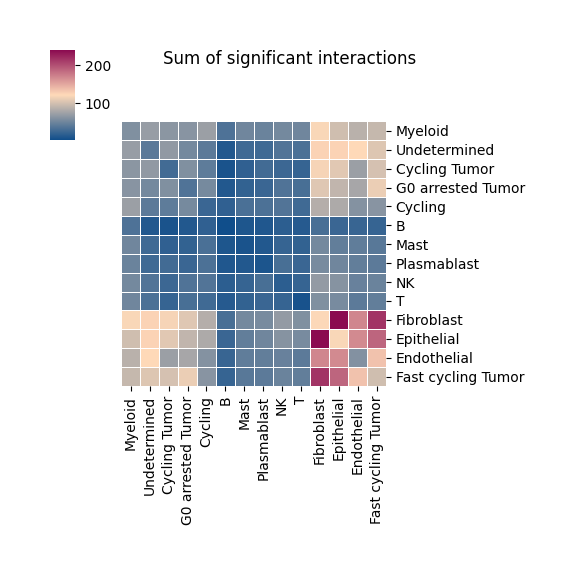

In [6]:
kpy.plot_cpdb_heatmap(pvals = cpdb_results['pvalues'],
                      degs_analysis = False,
                      figsize = (5, 5),
                      title = "Sum of significant interactions")

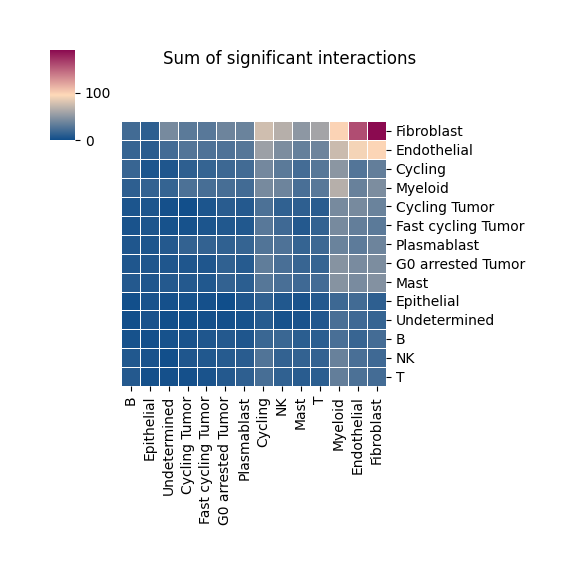

In [7]:
kpy.plot_cpdb_heatmap(
    pvals=cpdb_results['pvalues'],
    figsize=(5, 5),
    title="Sum of significant interactions",
    symmetrical=False,
)


In [8]:
adata.obs.cell_type.value_counts()

cell_type
T                     10643
Fibroblast             3939
B                      3937
Endothelial            2072
NK                     1022
Myeloid                 936
Undetermined            748
Mast                    666
Plasmablast             590
Epithelial              272
Cycling                 124
Cycling Tumor            32
Fast cycling Tumor       26
G0 arrested Tumor        16
Name: count, dtype: int64

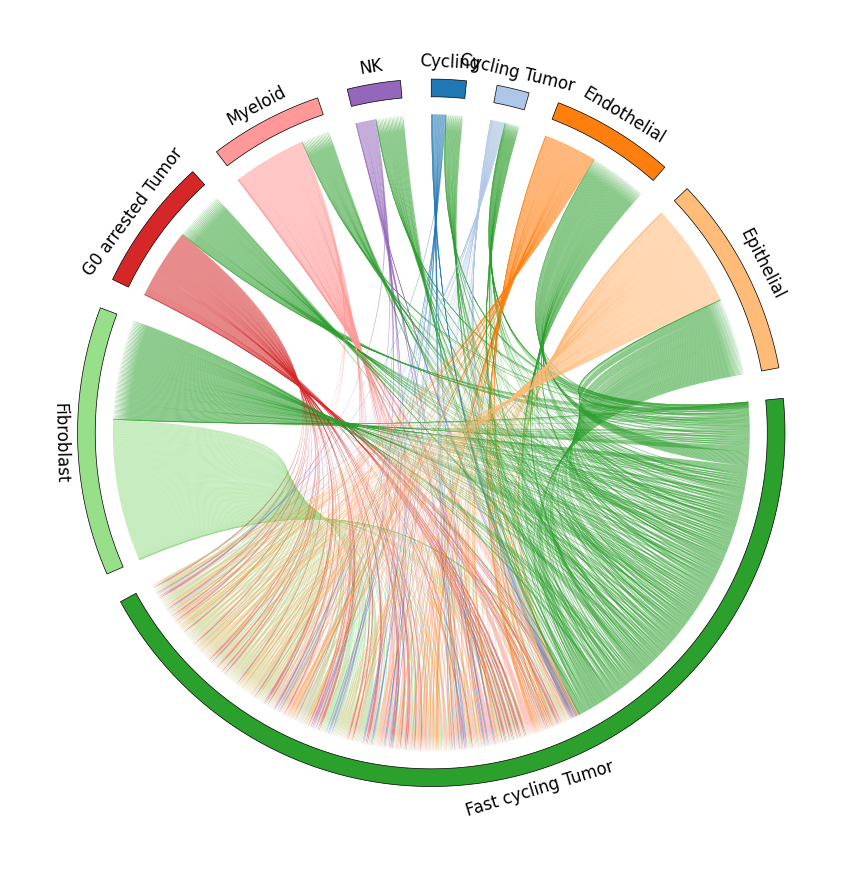

In [9]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="Fast cycling Tumor",
    cell_type2="NK|Fibroblast|Endothelial|Cycling|Epithelial|Myeloid|Cycling Tumor|G0 arrested Tumor",
    means=cpdb_results['means'],
    pvals=cpdb_results['pvalues'],
    deconvoluted=cpdb_results['deconvoluted'],
    celltype_key="cell_type",
    link_kwargs={"direction": 1, "allow_twist": True, "r1": 90, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (3, 1), "fontsize": 8},
    link_offset=1,
    same_producer_colors=True,
)

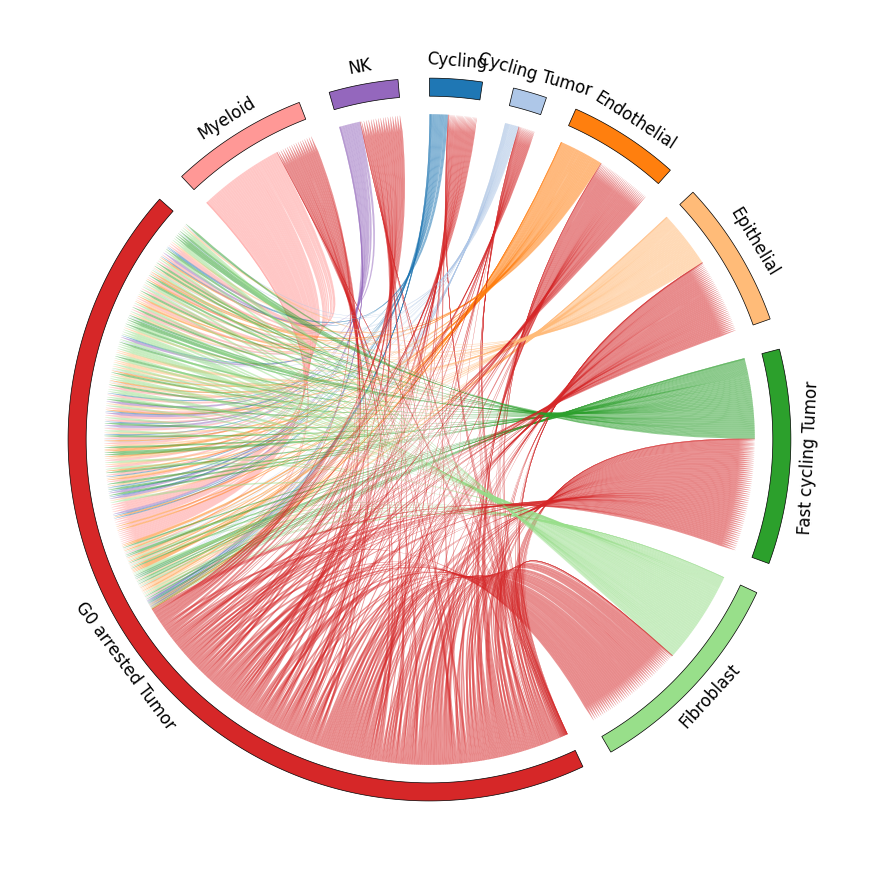

In [10]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="G0 arrested Tumor",
    cell_type2="NK|Fibroblast|Endothelial|Cycling|Epithelial|Myeloid|Fast cycling Tumor|Cycling Tumor",
    means=cpdb_results['means'],
    pvals=cpdb_results['pvalues'],
    deconvoluted=cpdb_results['deconvoluted'],
    celltype_key="cell_type",
    link_kwargs={"direction": 1, "allow_twist": True, "r1": 90, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (3, 1), "fontsize": 8},
    link_offset=1,
    same_producer_colors=True,
)

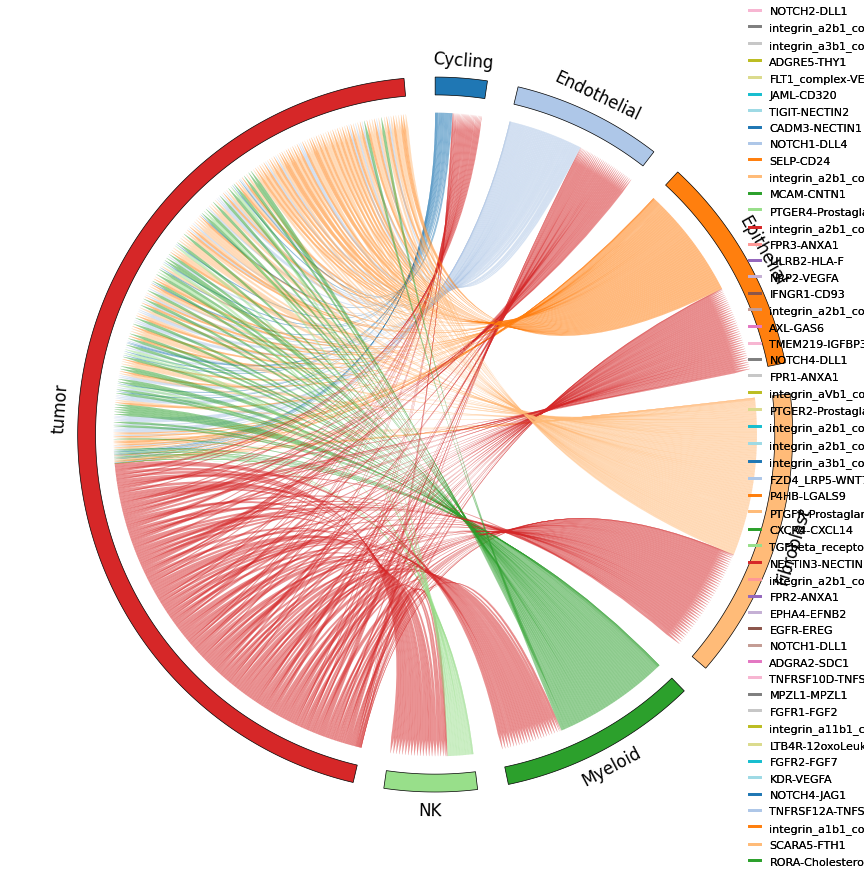

In [14]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="tumor",
    cell_type2="NK|Fibroblast|Endothelial|Cycling|Epithelial|Myeloid",
    means=cpdb_results['means'],
    pvals=cpdb_results['pvalues'],
    deconvoluted=cpdb_results['deconvoluted'],
    celltype_key="cell_type",
    link_kwargs={"direction": 1, "allow_twist": True, "r1": 90, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (1.1, 1), "fontsize": 8},
    link_offset=1,
    same_producer_colors=True,
)

# DGE cellphone DB run

In [1]:
from cellphonedb.src.core.methods import cpdb_degs_analysis_method

cpdb_results = cpdb_degs_analysis_method.call(
         cpdb_file_path = "/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/v5.0.0/cellphonedb.zip",
         meta_file_path = "/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/all_CPDB_df_G0.csv",
         counts_file_path = "/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/adata_with_rounded.h5ad",
         degs_file_path = "/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/fast_G0_tumCells_DEGs.tsv",
         counts_data = 'hgnc_symbol',
         threshold = 0.1,
         output_path = './DGE_results',
         score_interactions=True)

[ ][CORE][21/05/25-12:19:45][INFO] [Cluster DEGs Analysis] Threshold:0.1 Precision:3
Reading user files...
The following user files were loaded successfully:
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/adata_with_rounded.h5ad
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/all_CPDB_df_G0.csv
/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/data/fast_G0_tumCells_DEGs.tsv
[ ][CORE][21/05/25-12:20:33][INFO] Running Real Analysis
[ ][CORE][21/05/25-12:20:33][INFO] Running DEGs-based Analysis
[ ][CORE][21/05/25-12:20:33][INFO] Building results
[ ][CORE][21/05/25-12:20:33][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 14/14 [00:00<00:00, 28.18it/s]

[ ][CORE][21/05/25-12:20:33][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 14/14 [00:00<00:00, 114.52it/s]
/Users/alex/miniconda3/envs/cpdb/lib/python3.11/site-packages/cellphonedb/utils/scoring_utils.py:138: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matrix[index_name].replace(to_replace=id2name, inplace=True)


[ ][CORE][21/05/25-12:20:34][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 196/196 [00:26<00:00,  7.32it/s]


Saved deconvoluted to ./DGE_results/degs_analysis_deconvoluted_05_21_2025_122101.txt
Saved deconvoluted_percents to ./DGE_results/degs_analysis_deconvoluted_percents_05_21_2025_122101.txt
Saved means to ./DGE_results/degs_analysis_means_05_21_2025_122101.txt
Saved relevant_interactions to ./DGE_results/degs_analysis_relevant_interactions_05_21_2025_122101.txt
Saved significant_means to ./DGE_results/degs_analysis_significant_means_05_21_2025_122101.txt
Saved interaction_scores to ./DGE_results/degs_analysis_interaction_scores_05_21_2025_122101.txt


In [2]:
cpdb_results

{'deconvoluted':              gene_name uniprot  is_complex protein_name  \
 multidata_id                                              
 1355           UBASH3B  Q8TF42        True  UBS3B_HUMAN   
 1355           UBASH3B  Q8TF42        True  UBS3B_HUMAN   
 1355           UBASH3B  Q8TF42        True  UBS3B_HUMAN   
 1356           SULT1A1  P50225        True  ST1A1_HUMAN   
 1356           SULT1A1  P50225        True  ST1A1_HUMAN   
 ...                ...     ...         ...          ...   
 941              STRA6  Q9BX79       False  STRA6_HUMAN   
 1354              TLR8  Q9NR97       False   TLR8_HUMAN   
 363               CD44  P16070       False   CD44_HUMAN   
 1353           SIGLEC1  Q9BZZ2       False     SN_HUMAN   
 368             PECAM1  P16284       False  PECA1_HUMAN   
 
                               complex_name id_cp_interaction     gene      B  \
 multidata_id                                                                   
 1355          Dehydroepiandrosterone_by

In [6]:
kpy.plot_cpdb_heatmap(
    pvals=cpdb_results['pvalues'],
    figsize=(5, 5),
    title="Sum of significant interactions",
    symmetrical=False,
)

KeyError: 'pvalues'

In [15]:
# Generate plots---------------------------------------------------------------- Adapated from CENKs G0 paper
import ktplotspy as kpy
import matplotlib
%matplotlib inline


from IPython.display import HTML, display

means = pd.read_csv("/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/DGE_results/degs_analysis_significant_means_05_21_2025_115933.txt", sep="\t")
pvals = pd.read_csv("/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/DGE_results/degs_analysis_relevant_interactions_05_20_2025_211832.txt", sep="\t")
decon = pd.read_csv("/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/DGE_results/degs_analysis_deconvoluted_05_20_2025_211832.txt", sep="\t")
scores = pd.read_csv("/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/DGE_results/degs_analysis_interaction_scores_05_21_2025_122101.txt", sep="\t")

# Extended Data Fig 6e
kpy.plot_cpdb_heatmap(pvals = pvals, degs_analysis=True, figsize=(5, 5), title="Sum of significant interactions", symmetrical=False)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/alex/Documents/BIOL0041-Project/OAC_masters_project/CPDB/DGE_results/degs_analysis_significant_means_05_21_2025_115933.txt'

In [14]:
p=kpy.plot_cpdb(
    adata = adata,
    cell_type1 = "Fast cycling Tumor",
    cell_type2 = "G0 arrested Tumor",
    means = means,
    pvals = pvals,
    celltype_key = "cell_type",
    highlight_size = 1,
    degs_analysis=True,
    interaction_scores=scores,
    scale_alpha_by_interaction_scores=True,
    keep_significant_only=True,
    highlight_col = "#000000",
    max_size=5
    )



/Users/alex/miniconda3/envs/cpdb/lib/python3.11/site-packages/ktplotspy/plot/plot_cpdb.py:195: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


ValueError: The condensed distance matrix must contain only finite values.